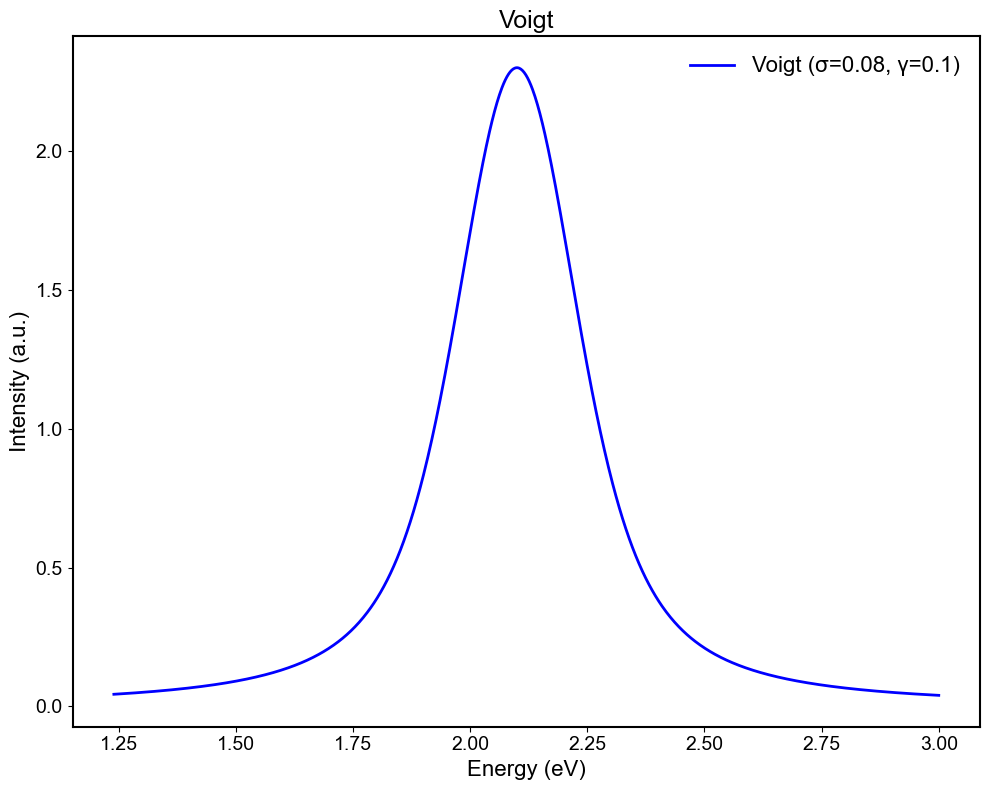

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import voigt_profile

#设置中文字体
plt.rcParams['font.sans-serif']=['Arial']    #使用Arial
plt.rcParams['axes.unicode_minus']=False   #正确使用负号

# 创建 x 轴数据
x = np.linspace(1.24, 3, 1000)

# 定义 Voigt 函数参数
sigma = 0.08  # Gaussian 标准差
gamma = 0.1  # Lorentzian 半高宽
center = 2.1  # 峰中心位置（需要添加这个参数）
amplitude = 1.0  # 峰高度

# 计算 Voigt 函数
y_voigt = amplitude * voigt_profile(x - center, sigma, gamma)

# 绘制 Voigt 函数
plt.figure(figsize=(10, 8))

plt.plot(x, y_voigt, 'b-', linewidth=2, label=f'Voigt (σ={sigma}, γ={gamma})')
plt.title('Voigt', fontsize=18)

#设置坐标轴字体大小
plt.xlabel('Energy (eV)', fontsize=16)   #x轴标签字体大小
plt.ylabel('Intensity (a.u.)', fontsize=16)   #y轴标签字体大小
plt.tick_params(axis='both', which='major', labelsize=14)   #坐标轴刻度字体大小

# 设置坐标轴线宽
ax = plt.gca()  # 获取当前坐标轴
ax.spines['top'].set_linewidth(1.5)     # 上边框线宽
ax.spines['right'].set_linewidth(1.5)   # 右边框线宽
ax.spines['bottom'].set_linewidth(1.5)  # 下边框线宽
ax.spines['left'].set_linewidth(1.5)    # 左边框线宽


plt.legend(fontsize=16, frameon=False)                   #图例字体大小，去除图例边框

plt.tight_layout()
plt.show()

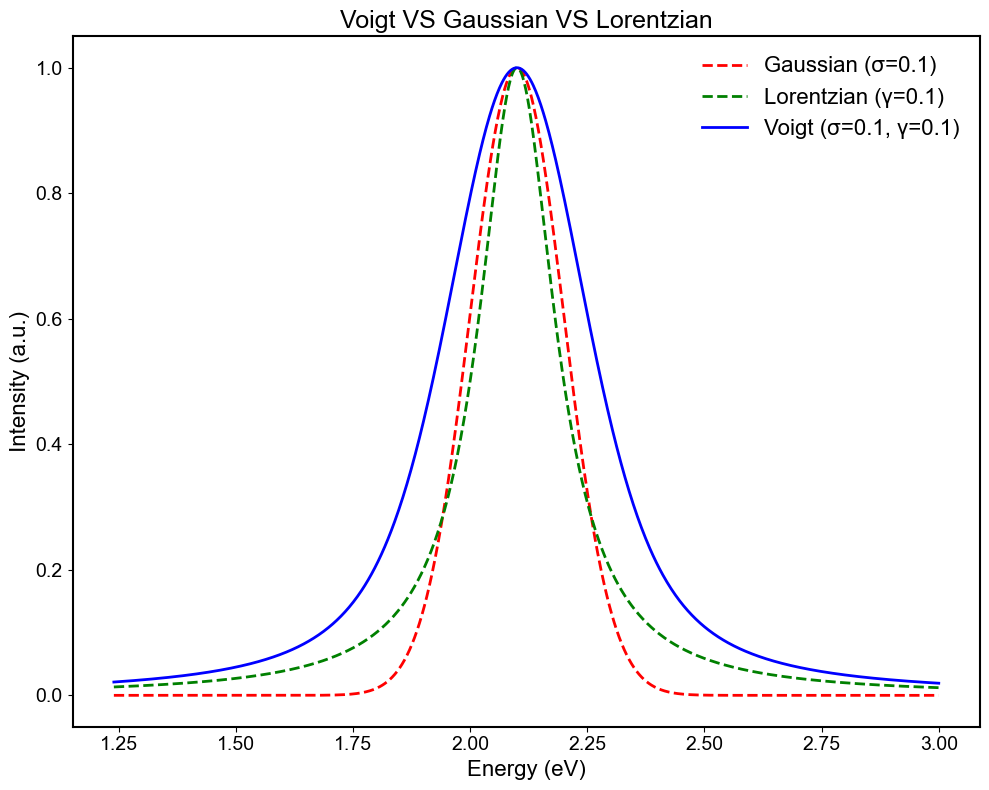

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import voigt_profile

#设置中文字体
plt.rcParams['font.sans-serif']=['Arial']    #使用Arial
plt.rcParams['axes.unicode_minus']=False   #正确使用负号

def gaussian(x, amplitude, center, sigma):
    """高斯函数"""
    return amplitude * np.exp(-(x - center)**2 / (2 * sigma**2))

def lorentzian(x, amplitude, center, gamma):
    """洛伦兹函数"""
    return amplitude * (gamma**2 / ((x - center)**2 + gamma**2))

# 参数设置
x = np.linspace(1.24, 3, 1000)
center = 2.1
amplitude = 1
sigma = 0.1  # Gaussian 宽度
gamma = 0.1  # Lorentzian 宽度

# 计算各函数
y_gaussian = gaussian(x, amplitude, center, sigma)
y_lorentzian = lorentzian(x, amplitude, center, gamma)
y_voigt = voigt_profile(x - center, sigma, gamma) * amplitude

# 归一化以便比较
y_gaussian /= np.max(y_gaussian)
y_lorentzian /= np.max(y_lorentzian)
y_voigt /= np.max(y_voigt)

# 绘制比较图
plt.figure(figsize=(10, 8))

plt.plot(x, y_gaussian, 'r--', linewidth=2, label=f'Gaussian (σ={sigma})')
plt.plot(x, y_lorentzian, 'g--', linewidth=2, label=f'Lorentzian (γ={gamma})')
plt.plot(x, y_voigt, 'b-', linewidth=2, label=f'Voigt (σ={sigma}, γ={gamma})')

plt.title('Voigt VS Gaussian VS Lorentzian', fontsize=18)

#设置坐标轴字体大小
plt.xlabel('Energy (eV)', fontsize=16)   #x轴标签字体大小
plt.ylabel('Intensity (a.u.)', fontsize=16)   #y轴标签字体大小
plt.tick_params(axis='both', which='major', labelsize=14)   #坐标轴刻度字体大小

# 设置坐标轴线宽
ax = plt.gca()  # 获取当前坐标轴
ax.spines['top'].set_linewidth(1.5)     # 上边框线宽
ax.spines['right'].set_linewidth(1.5)   # 右边框线宽
ax.spines['bottom'].set_linewidth(1.5)  # 下边框线宽
ax.spines['left'].set_linewidth(1.5)    # 左边框线宽


plt.legend(fontsize=16, frameon=False)                   #图例字体大小，去除图例边框

plt.tight_layout()
plt.show()

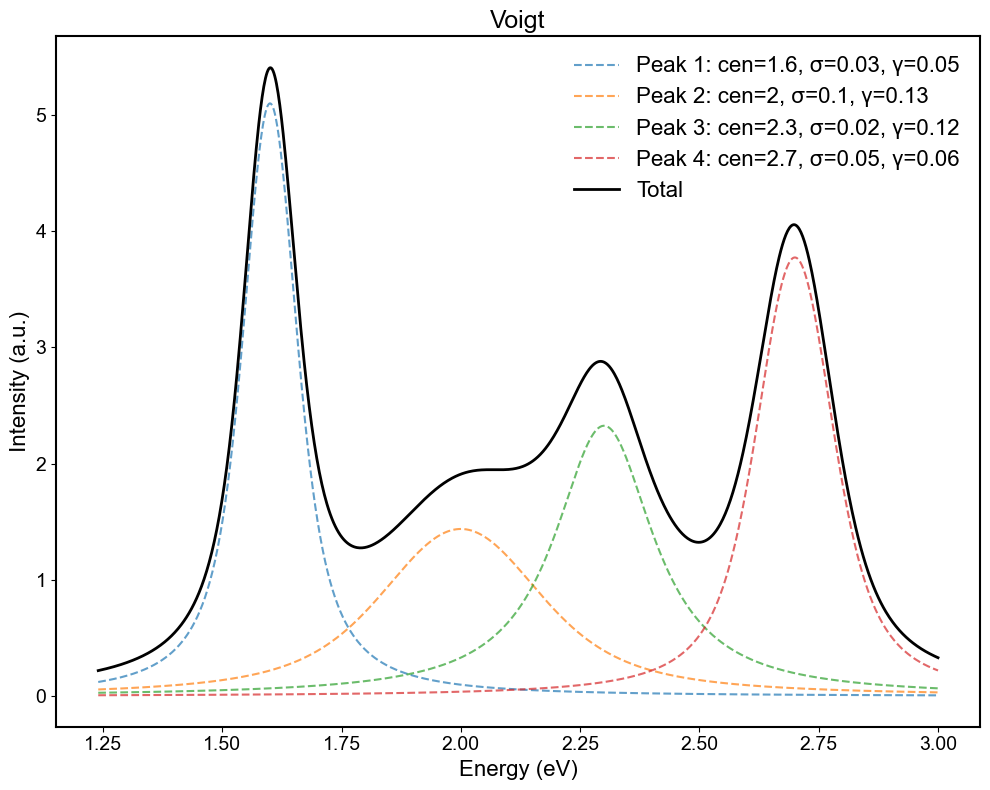

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import voigt_profile

#设置中文字体
plt.rcParams['font.sans-serif']=['Arial']    #使用Arial
plt.rcParams['axes.unicode_minus']=False   #正确使用负号

# 创建 x 轴数据
x = np.linspace(1.24, 3, 1000)

# 定义多个 Voigt 峰的参数
peaks = [
    {'amp': 1.0, 'cen': 1.6, 'sigma': 0.03, 'gamma': 0.05},
    {'amp': 0.8, 'cen': 2, 'sigma': 0.1, 'gamma': 0.13},
    {'amp': 0.9, 'cen': 2.3, 'sigma': 0.02, 'gamma': 0.12},
    {'amp': 1, 'cen': 2.7, 'sigma': 0.05, 'gamma': 0.06}
]

# 计算总信号
y_total = np.zeros_like(x)

plt.figure(figsize=(10, 8))

# 绘制每个单独的峰和总信号
for i, peak in enumerate(peaks):
    y_peak = peak['amp'] * voigt_profile(x - peak['cen'], peak['sigma'], peak['gamma'])
    y_total += y_peak
    
    # 绘制单个峰
    plt.plot(x, y_peak, '--', alpha=0.7, linewidth=1.5, 
             label=f'Peak {i+1}: cen={peak["cen"]}, σ={peak["sigma"]}, γ={peak["gamma"]}')

# 绘制总信号
plt.plot(x, y_total, 'k-', linewidth=2, label='Total')

plt.title('Voigt', fontsize=18)

#设置坐标轴字体大小
plt.xlabel('Energy (eV)', fontsize=16)   #x轴标签字体大小
plt.ylabel('Intensity (a.u.)', fontsize=16)   #y轴标签字体大小
plt.tick_params(axis='both', which='major', labelsize=14)   #坐标轴刻度字体大小

# 设置坐标轴线宽
ax = plt.gca()  # 获取当前坐标轴
ax.spines['top'].set_linewidth(1.5)     # 上边框线宽
ax.spines['right'].set_linewidth(1.5)   # 右边框线宽
ax.spines['bottom'].set_linewidth(1.5)  # 下边框线宽
ax.spines['left'].set_linewidth(1.5)    # 左边框线宽


plt.legend(fontsize=16, frameon=False)                   #图例字体大小，去除图例边框

plt.tight_layout()
plt.show()

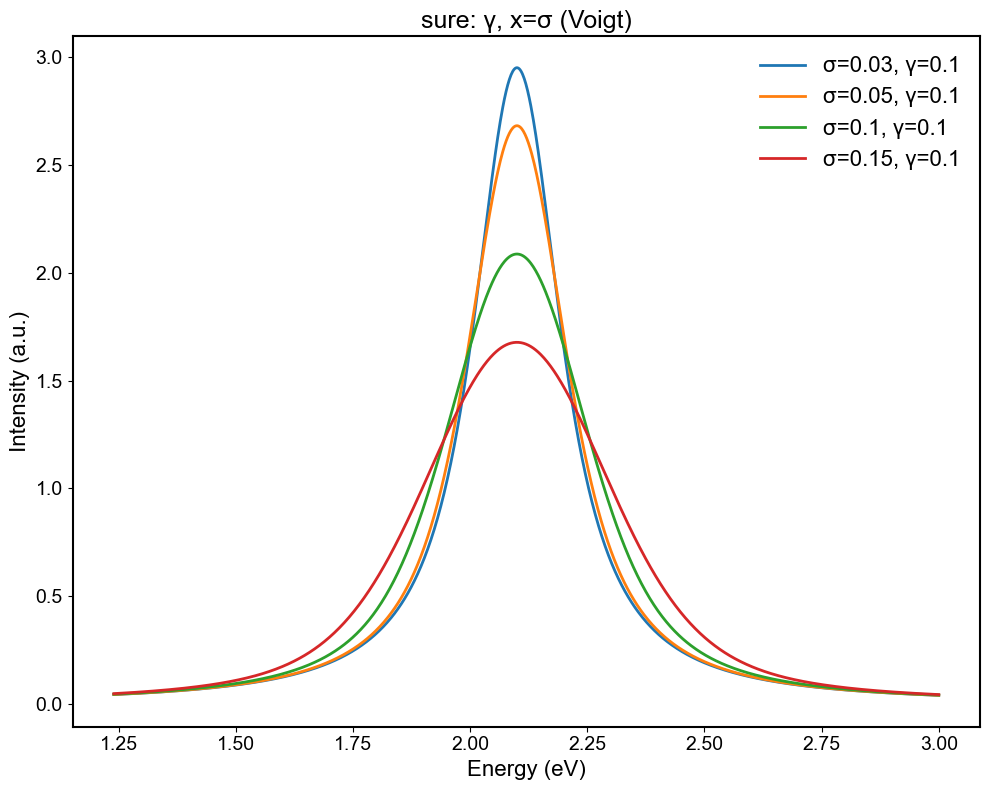

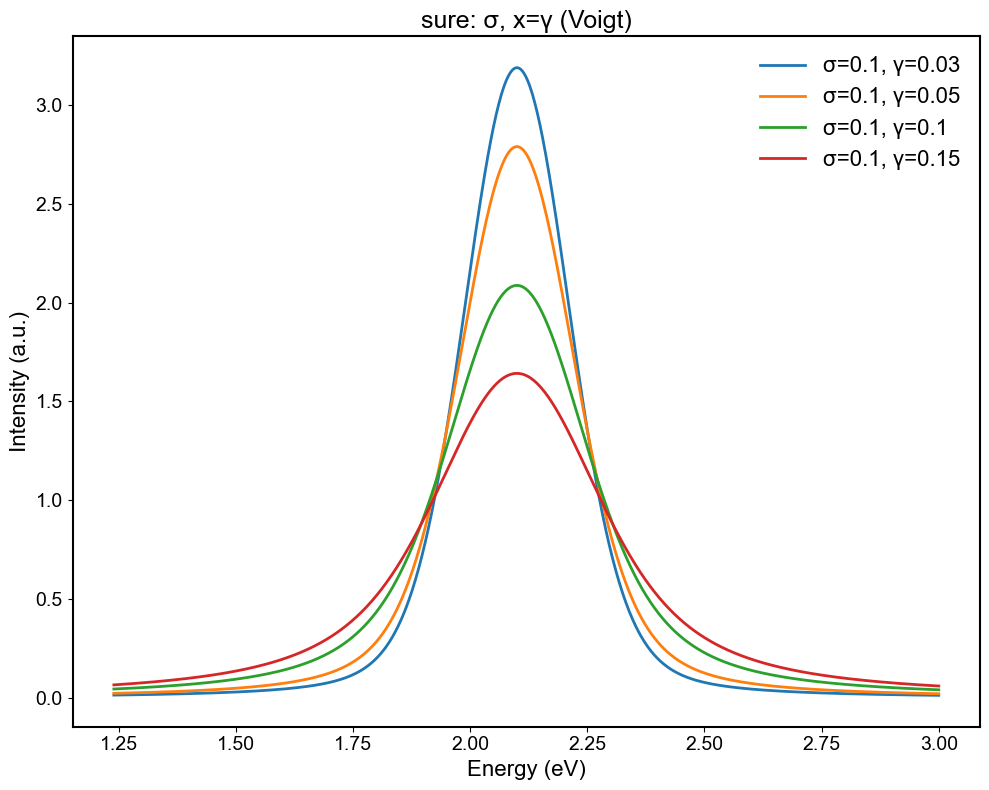

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import voigt_profile

#设置中文字体
plt.rcParams['font.sans-serif']=['Arial']    #使用Arial
plt.rcParams['axes.unicode_minus']=False   #正确使用负号

x = np.linspace(1.24, 3, 1000)

plt.figure(figsize=(10, 8))

# 固定 gamma，变化 sigma
sigma_values = [0.03, 0.05, 0.1, 0.15]
gamma_fixed = 0.1
x0=2.1

for i, sigma in enumerate(sigma_values):
    y = voigt_profile(x-x0, sigma, gamma_fixed)
    plt.plot(x, y, linewidth=2, label=f'σ={sigma}, γ={gamma_fixed}')

plt.title('sure: γ, x=σ (Voigt)', fontsize=18)

#设置坐标轴字体大小
plt.xlabel('Energy (eV)', fontsize=16)   #x轴标签字体大小
plt.ylabel('Intensity (a.u.)', fontsize=16)   #y轴标签字体大小
plt.tick_params(axis='both', which='major', labelsize=14)   #坐标轴刻度字体大小

# 设置坐标轴线宽
ax = plt.gca()  # 获取当前坐标轴
ax.spines['top'].set_linewidth(1.5)     # 上边框线宽
ax.spines['right'].set_linewidth(1.5)   # 右边框线宽
ax.spines['bottom'].set_linewidth(1.5)  # 下边框线宽
ax.spines['left'].set_linewidth(1.5)    # 左边框线宽


plt.legend(fontsize=16, frameon=False)                   #图例字体大小，去除图例边框

plt.tight_layout()
plt.show()

# 固定 sigma，变化 gamma
plt.figure(figsize=(10, 8))
sigma_fixed = 0.1
gamma_values = [0.03, 0.05, 0.1, 0.15]
x0=2.1

for i, gamma in enumerate(gamma_values):
    y = voigt_profile(x-x0, sigma_fixed, gamma)
    plt.plot(x, y, linewidth=2, label=f'σ={sigma_fixed}, γ={gamma}')

plt.title('sure: σ, x=γ (Voigt)', fontsize=18)

#设置坐标轴字体大小
plt.xlabel('Energy (eV)', fontsize=16)   #x轴标签字体大小
plt.ylabel('Intensity (a.u.)', fontsize=16)   #y轴标签字体大小
plt.tick_params(axis='both', which='major', labelsize=14)   #坐标轴刻度字体大小

# 设置坐标轴线宽
ax = plt.gca()  # 获取当前坐标轴
ax.spines['top'].set_linewidth(1.5)     # 上边框线宽
ax.spines['right'].set_linewidth(1.5)   # 右边框线宽
ax.spines['bottom'].set_linewidth(1.5)  # 下边框线宽
ax.spines['left'].set_linewidth(1.5)    # 左边框线宽


plt.legend(fontsize=16, frameon=False)                   #图例字体大小，去除图例边框

plt.tight_layout()
plt.show()

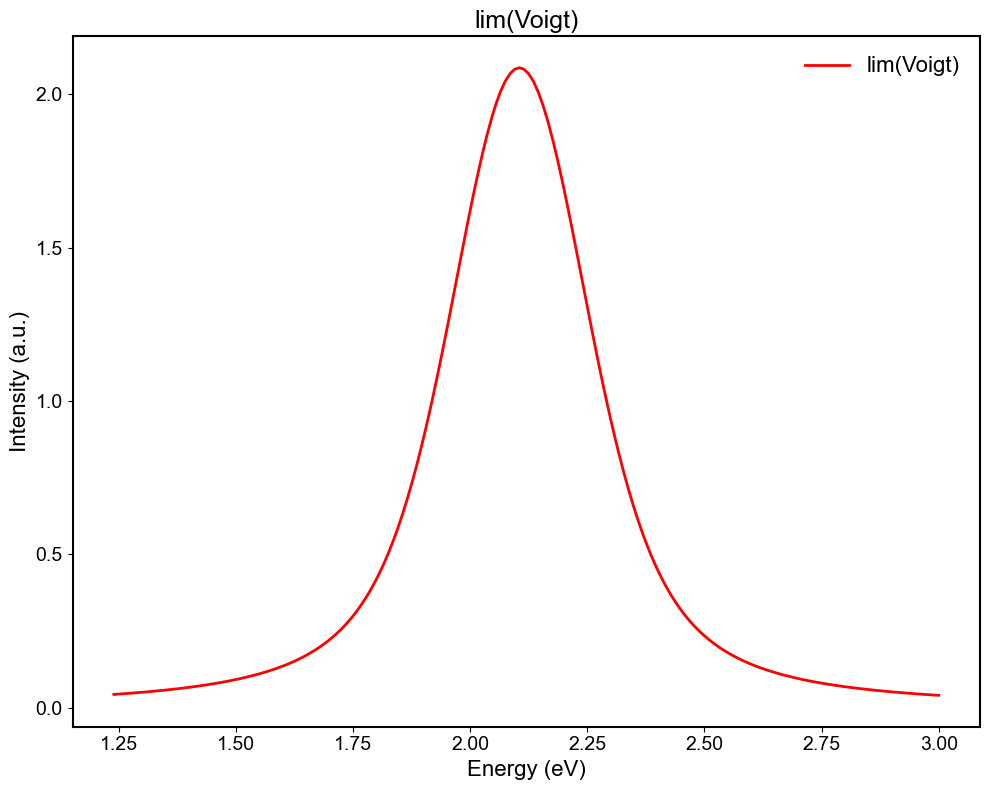

计算得到的峰中心位置: 2.105 eV
目标峰中心位置: 2.1 eV
误差: 0.005025 eV


In [5]:
import numpy as np
import matplotlib.pyplot as plt

#设置中文字体
plt.rcParams['font.sans-serif']=['Arial']    #使用Arial
plt.rcParams['axes.unicode_minus']=False   #正确使用负号

plt.figure(figsize=(10, 8))

def approximate_voigt(x, center, sigma, gamma, n_points=1000):
    """通过数值卷积近似 Voigt 函数，卷积直接以指定中心进行"""
    # 创建卷积用的x轴数据（以指定的center为中心）
    x_conv = np.linspace(center-5, center+5, n_points)  # 以center为中心扩展范围
    dx = x_conv[1] - x_conv[0]
    
    gaussian = np.exp(-(x_conv - center)**2 / (2 * sigma**2)) / (sigma * np.sqrt(2 * np.pi))
    lorentzian = (gamma / np.pi) / ((x_conv - center)**2 + gamma**2)
    
    # 数值卷积
    voigt_approx = np.convolve(gaussian, lorentzian, mode='same') * dx
    
    # 插值到原始 x 网格
    from scipy.interpolate import interp1d
    interp_func = interp1d(x_conv - center, voigt_approx, bounds_error=False, fill_value=0)
    return interp_func(x - center)

# 使用示例
x = np.linspace(1.24, 3, 1000)
center = 2.1  # 设置峰中心在2.1 eV
sigma = 0.1   # Gaussian 宽度
gamma = 0.1   # Lorentzian 宽度

y_voigt_approx = approximate_voigt(x, center, sigma, gamma)
plt.plot(x, y_voigt_approx, 'r-', linewidth=2, label='lim(Voigt)')

plt.title('lim(Voigt)', fontsize=18)

#设置坐标轴字体大小
plt.xlabel('Energy (eV)', fontsize=16)   #x轴标签字体大小
plt.ylabel('Intensity (a.u.)', fontsize=16)   #y轴标签字体大小
plt.tick_params(axis='both', which='major', labelsize=14)   #坐标轴刻度字体大小

# 设置坐标轴线宽
ax = plt.gca()  # 获取当前坐标轴
ax.spines['top'].set_linewidth(1.5)     # 上边框线宽
ax.spines['right'].set_linewidth(1.5)   # 右边框线宽
ax.spines['bottom'].set_linewidth(1.5)  # 下边框线宽
ax.spines['left'].set_linewidth(1.5)    # 左边框线宽


plt.legend(fontsize=16, frameon=False)                   #图例字体大小，去除图例边框

plt.tight_layout()
plt.show()

# 验证峰中心位置
peak_index = np.argmax(y_voigt_approx)
peak_center = x[peak_index]
print(f"计算得到的峰中心位置: {peak_center:.3f} eV")
print(f"目标峰中心位置: {center} eV")
print(f"误差: {abs(peak_center - center):.6f} eV")

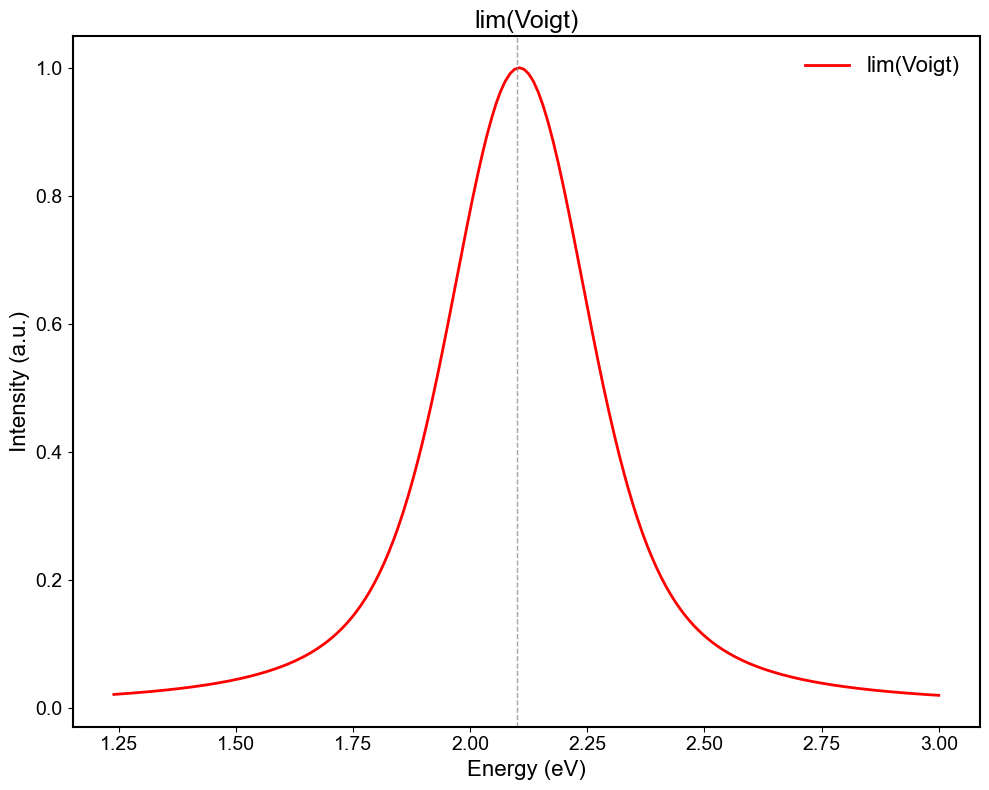

计算得到的峰中心位置: 2.105 eV
目标峰中心位置: 2.1 eV
误差: 0.005025 eV


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['Arial']    # 使用Arial
plt.rcParams['axes.unicode_minus'] = False   # 正确使用负号

plt.figure(figsize=(10, 8))

def approximate_voigt(x, center, sigma, gamma, n_points=1000):
    """通过数值卷积近似 Voigt 函数，卷积直接以指定中心进行"""
    # 创建卷积用的x轴数据（以指定的center为中心）
    x_conv = np.linspace(center-5, center+5, n_points)  # 以center为中心扩展范围
    dx = x_conv[1] - x_conv[0]
    
    # 创建高斯函数（以center为中心）
    gaussian = np.exp(-(x_conv - center)**2 / (2 * sigma**2)) / (sigma * np.sqrt(2 * np.pi))
    
    # 创建洛伦兹函数（以center为中心）
    lorentzian = (gamma / np.pi) / ((x_conv - center)**2 + gamma**2)
    
    # 数值卷积
    voigt_approx = np.convolve(gaussian, lorentzian, mode='same') * dx
    
    # 归一化
    voigt_approx /= np.max(voigt_approx)
    
    # 直接插值到目标x网格（不需要centering）
    interp_func = interp1d(x_conv, voigt_approx, bounds_error=False, fill_value=0)
    
    return interp_func(x)

# 使用示例
x = np.linspace(1.24, 3, 1000)
center = 2.1  # 设置峰中心在2.1 eV
sigma = 0.1   # Gaussian 宽度
gamma = 0.1   # Lorentzian 宽度

y_voigt_approx = approximate_voigt(x, center, sigma, gamma)

plt.plot(x, y_voigt_approx, 'r-', linewidth=2, label='lim(Voigt)')

plt.title('lim(Voigt)', fontsize=18)

# 设置坐标轴字体大小
plt.xlabel('Energy (eV)', fontsize=16)   # x轴标签字体大小
plt.ylabel('Intensity (a.u.)', fontsize=16)   # y轴标签字体大小
plt.tick_params(axis='both', which='major', labelsize=14)   # 坐标轴刻度字体大小

# 设置坐标轴线宽
ax = plt.gca()  # 获取当前坐标轴
ax.spines['top'].set_linewidth(1.5)     # 上边框线宽
ax.spines['right'].set_linewidth(1.5)   # 右边框线宽
ax.spines['bottom'].set_linewidth(1.5)  # 下边框线宽
ax.spines['left'].set_linewidth(1.5)    # 左边框线宽

# 添加峰中心标记
plt.axvline(x=center, color='gray', linestyle='--', alpha=0.7, linewidth=1)

plt.legend(fontsize=16, frameon=False)  # 图例字体大小，去除图例边框

plt.tight_layout()
plt.show()

# 验证峰中心位置
peak_index = np.argmax(y_voigt_approx)
peak_center = x[peak_index]
print(f"计算得到的峰中心位置: {peak_center:.3f} eV")
print(f"目标峰中心位置: {center} eV")
print(f"误差: {abs(peak_center - center):.6f} eV")